In [91]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

In [92]:
df = pd.read_csv("D:\DataScience\SVM\Blood_donation.txt",sep=",",names=['Rec','Freq','Mon','Time','Class'],header=0)
df.head()

,Rec,Freq,Mon,Time,Class
0,0,13,3250,28,1
1,1,16,4000,35,1
2,2,20,5000,45,1
3,1,24,6000,77,0
4,4,4,1000,4,0


In [93]:
cols=df.shape[1]



In [94]:
cols


5

In [95]:
X=df.iloc[:,0:cols-1]
X.head()


,Rec,Freq,Mon,Time
0,0,13,3250,28
1,1,16,4000,35
2,2,20,5000,45
3,1,24,6000,77
4,4,4,1000,4


In [112]:
Y=df.iloc[:,cols-1:cols]
Y.head()

,Class
0,1
1,1
2,1
3,0
4,0


In [39]:
%matplotlib inline

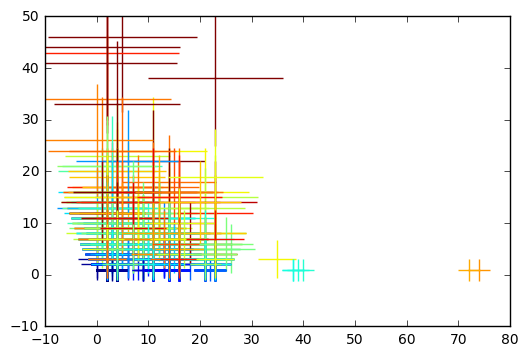

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Rec'],df['Freq'],df['Mon'],df['Time'],marker='+')#You can also add more variables here to represent color and size.

plt.show()

In [97]:
%matplotlib inline


In [113]:
from sklearn import svm  
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)

In [114]:
ou1=svc.fit(X,Y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
from mpl_toolkits.mplot3d import Axes3D

<function matplotlib.pyplot.show>

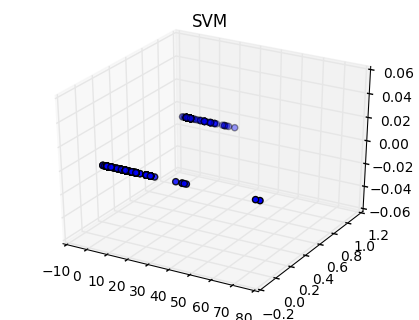

In [63]:

fig1 = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig1)
#colormap=np.array(['red','blue','green'])
ax.scatter(df['Rec'],df['Class']);
plt.title('SVM')
plt.show





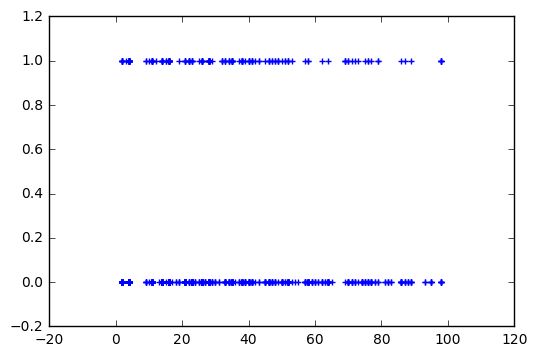

In [67]:
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)
ax.scatter(df['Time'],df['Class'],marker='+')#You can also add more variables here to represent color and size.
plt.show()

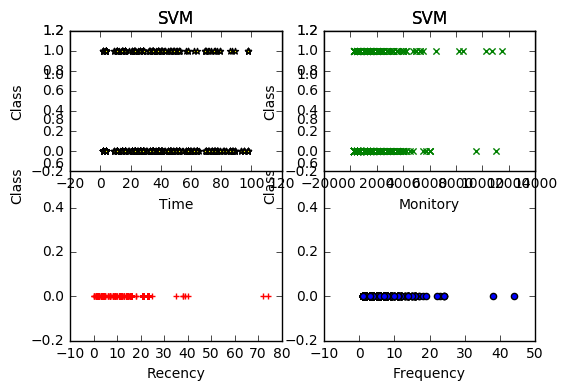

In [122]:
fig3 = plt.figure()
ax = fig3.add_subplot(1,2,1)
ax.scatter(df['Rec'],df['Class'],marker='+',c=['Red'])
ax.legend(loc=2)  
ax.set_xlabel('Recency')  
ax.set_ylabel('Class')  
ax.set_title('SVM') 
ax = fig3.add_subplot(1,2,2)
ax.scatter(df['Freq'],df['Class'],marker='o',c=['Blue'])
ax.set_xlabel('Frequency')  
ax.set_ylabel('Class')  
ax.set_title('SVM') 
ax = fig3.add_subplot(2,2,1)
ax.scatter(df['Time'],df['Class'],marker='*',c=['Yellow'])
ax.set_xlabel('Time')  
ax.set_ylabel('Class')  
ax.set_title('SVM') 
ax = fig3.add_subplot(2,2,2)
ax.scatter(df['Mon'],df['Class'],marker='x',c=['Green'])
ax.set_xlabel('Monitory')  
ax.set_ylabel('Class')  
ax.set_title('SVM') 
plt.show()



In [115]:
ndTest=np.matrix([[2,6,1500,15],[2,5,1250,11],[4,11,2750,28],[0,13,3250,28]])

In [116]:
cTest=ou1.predict(ndTest)

In [117]:
cTest


array([0, 0, 0, 0], dtype=int64)

In [118]:
ndTest=np.matrix([[2,10,1500,15],[2,5,1250,11]])

In [119]:
cTest=ou1.predict(ndTest)

In [120]:
cTest

array([0, 0], dtype=int64)

In [137]:
X1=df.iloc[:,0:2]
X1.head()
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
ou2=svc.fit(X1,Y)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
h = .02 #step size
x_min, x_max = X['Rec'].min() - 1, X['Rec'].max() + 1
y_min, y_max = X['Freq'].min() - 1, X['Freq'].max() + 1


In [143]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


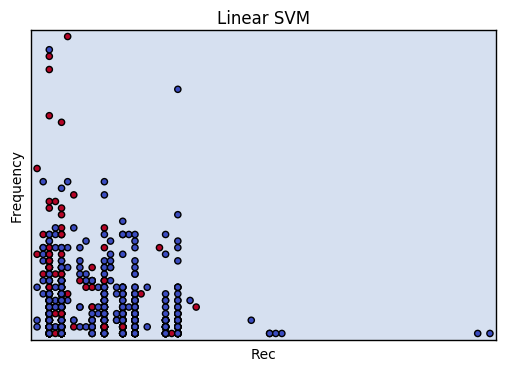

In [147]:
plt.subplot(1,1,1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = ou2.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X['Rec'], X['Freq'], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Rec')
plt.ylabel('Frequency')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Linear SVM')

plt.show()